# Markdown to run and plot pairs of Individuals

In [6]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

sys.path.append("./python3/") 
from main import HMM_Full
from plot.plot_posterior import plot_posterior, plot_posterior_panel

### hapsburgImport
sys.path.insert(0,"/n/groups/reich/hringbauer/git/HAPSBURG/package/")
from hapsburg.PackagesSupport.parallel_runs.helper_functions import combine_individual_data

sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")  # hack to get development package first in path
from hapBLOCK.IO.h5_load import get_opp_homos_f

compute-e-16-231.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


In [2]:
def run_plot_pair(folder_in="./data/hdf5/1240k_v43/ch", iids = ["", ""], ch=2,
                  folder_out="", plot=False, savepath="", output=False, 
                  ibd_in=1, ibd_out=1, ibd_jump=500, min_cm=2, 
                  title="", c="gray", c_hw="maroon", ms=1,
                  ):
    """Run and plot IBD for pair of Individuals.
    folder_out: Where to save the hapBLOCK output to
    savepath: Where to save the IBD plot to"""
    assert(len(iids)==2) # Sanity Check of Input IIDs

    h = HMM_Full(folder_in=folder_in, l_model="hdf5", t_model="standard", 
                     e_model="haploid_gl", h_model = "FiveStateFast",
                     output=output, load=True)
    h.t_obj.set_params(ibd_in = ibd_in, ibd_out = ibd_out, ibd_jump = ibd_jump)
    h.l_obj.set_params(iids=iids, ch=ch)
    h.p_obj.set_params(ch=ch)
    post, r_vec, fwd, bwd, tot_ll = h.run_fwd_bwd()
    df_ibd, _, _ = h.p_obj.call_roh(r_vec, post)
    
    if len(folder_out)>0:
        folder_out = h.prepare_path(folder_out, iid=iids, ch=ch, prefix_out="", logfile=False)
        h.p_obj.save_output(df=df_ibd, save_folder=folder_out) # r_map=[], post=[]
        
    if plot:
        if len(title)==0:
            title = f"hapBLOCK v0.1, {iids[0]} - {iids[1]}, Chr. {ch}"
            
        ### Load the data from the HDF5
        o_homos, m = get_opp_homos_f(iid1=iids[0], iid2=iids[1], 
                                     f_path=folder_in, ch=ch)
            
        plot_posterior(post=post, morgan=r_vec, min_cm=min_cm, ms=ms,
                       df_ibd=df_ibd, het=o_homos, het_m=m, fs_l=12, 
                       title=title, show=True, savepath=savepath, xlabel="Chromosome Position [cM]")
        
    # Legacy to plot the 5 state HMM   
    #if plot_5state:
    #    plot_posterior_panel(post=post, ch=ch, figsize=(12, 8),
    #                         xlim=[], lw=1, c=c, c_hw=c_hw, title=title, savepath=savepath)

Minimum Genetic Map: 0.0001 Morgan
Maximum Genetic Map: 2.6883 Morgan
Gaps bigger than 0.1 cM: 245
Maximum Gap: 1.8302 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 147.144704 mB
Total Log likelihood: -209685.780
Fraction Markers above IBD cutoff: 0.9276
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 68.81 cM
Fraction Markers above IBD cutoff: 0.9276
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 68.81 cM
Successfully saved output to ./output/empirical/test2/COR002_COR001/chr2/
Filtering to 0.99 GP variants: 0.908x
Filtering to 0.99 GP variants: 0.868x
Filtering to common GP variants: 0.820x


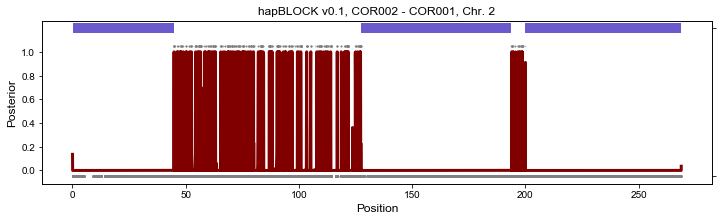

In [3]:
run_plot_pair(iids=["COR002","COR001"], ch=2, plot=True, folder_out="./output/empirical/test2/")

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 160.284672 mB
Total Log likelihood: -182828.986
Fraction Markers above IBD cutoff: 0.8751
Merged n=3 gaps < 0.01 M
Called n=8 IBD Blocks > 4.0 cM
Longest Block: 48.23 cM
Fraction Markers above IBD cutoff: 0.8751
Merged n=3 gaps < 0.01 M
Called n=8 IBD Blocks > 4.0 cM
Longest Block: 48.23 cM
Filtering to 0.99 GP variants: 0.675x
Filtering to 0.99 GP variants: 0.647x
Filtering to common GP variants: 0.515x


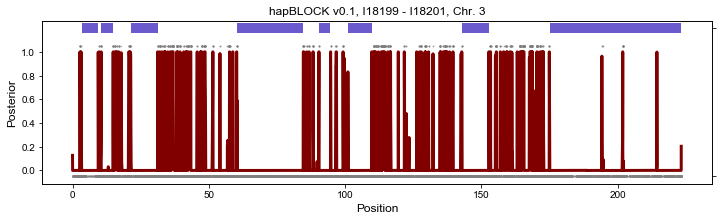

In [4]:
run_plot_pair(iids=["I18199","I18201"], ch=3, plot=True)

Minimum Genetic Map: 0.0001 Morgan
Maximum Genetic Map: 2.6883 Morgan
Gaps bigger than 0.1 cM: 245
Maximum Gap: 1.8302 cM
Upper Gap Cutoff: 5.0000 cM
Reference Number: 4
Memory Usage Full:
Memory Usage: 273.260544 mB
Total Log likelihood: -203152.953


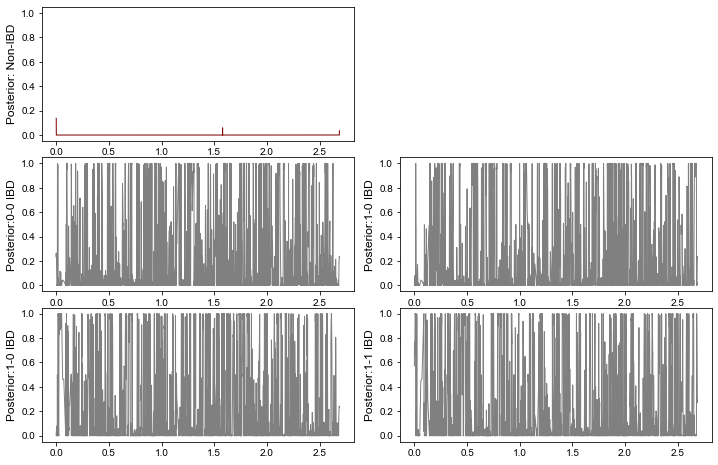

In [32]:
run_plot_pair(iids=["SUC002","SUC003"], ch=2)

### Run parent offspring

Minimum Genetic Map: 0.0004 Morgan
Maximum Genetic Map: 2.0409 Morgan
Gaps bigger than 0.1 cM: 210
Maximum Gap: 1.0498 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 136.794112 mB
Total Log likelihood: -148624.683
Fraction Markers above IBD cutoff: 0.9990
Merged n=1 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 204.04 cM
Fraction Markers above IBD cutoff: 0.9990
Merged n=1 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 204.04 cM


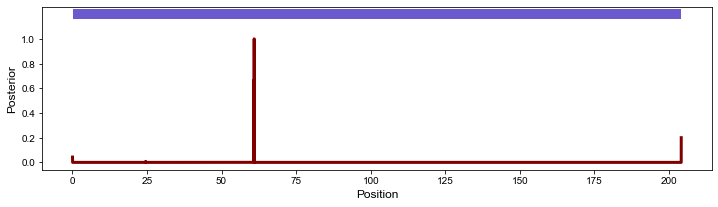

CPU times: user 887 ms, sys: 64.9 ms, total: 952 ms
Wall time: 3.08 s


In [3]:
%%time
run_plot_pair(iids=["I3949.DG","I3950.DG"], ch=5)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 140.099584 mB
Total Log likelihood: -184949.554
Fraction Markers above IBD cutoff: 0.7805
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 6.31 cM
Fraction Markers above IBD cutoff: 0.7805
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 6.31 cM
Filtering to 0.99 GP variants: 0.817x
Filtering to 0.99 GP variants: 0.942x
Filtering to common GP variants: 0.786x


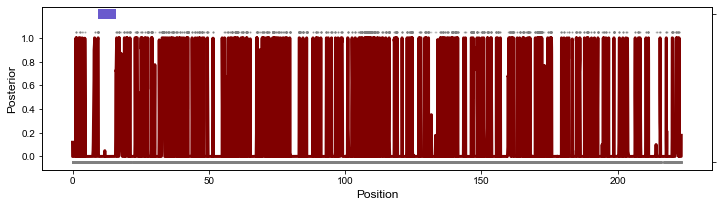

CPU times: user 1.09 s, sys: 65.2 ms, total: 1.16 s
Wall time: 1.24 s


In [4]:
%%time
run_plot_pair(iids=["SUC002", "MA110"], 
                    ibd_out=1, ibd_in=1, ch=3)

# Plot Inigos Samples

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 245.874688 mB
Total Log likelihood: -177086.057
Fraction Markers above IBD cutoff: 0.8517
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 36.52 cM
Fraction Markers above IBD cutoff: 0.8517
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 36.52 cM
Filtering to 0.99 GP variants: 0.950x
Filtering to 0.99 GP variants: 0.919x
Filtering to common GP variants: 0.890x


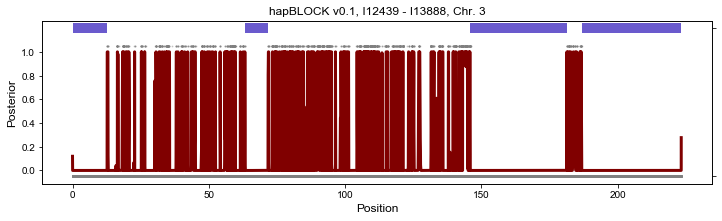

CPU times: user 1.18 s, sys: 46 ms, total: 1.22 s
Wall time: 1.31 s


In [14]:
%%time
run_plot_pair(iids=["I12439", "I13888"], 
                    ibd_out=1, ibd_in=1, ch=3)

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 301.514752 mB
Total Log likelihood: -171756.024
Fraction Markers above IBD cutoff: 0.9999
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 223.24 cM
Fraction Markers above IBD cutoff: 0.9999
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 223.24 cM
Filtering to 0.99 GP variants: 0.556x
Filtering to 0.99 GP variants: 0.919x
Filtering to common GP variants: 0.542x


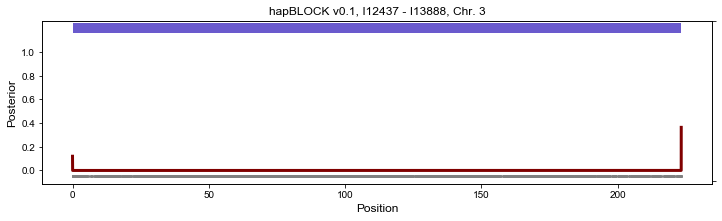

CPU times: user 1.17 s, sys: 25.4 ms, total: 1.19 s
Wall time: 3.18 s


In [75]:
%%time
run_plot_pair(iids=["I12437", "I13888"], 
                    ibd_out=1, ibd_in=1, ch=3) ### PO

### The other side

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 276.365312 mB
Total Log likelihood: -206364.299
Fraction Markers above IBD cutoff: 0.8303
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 62.51 cM
Fraction Markers above IBD cutoff: 0.8303
Merged n=0 gaps < 0.01 M
Called n=1 IBD Blocks > 4.0 cM
Longest Block: 62.51 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.901x
Filtering to common GP variants: 0.847x


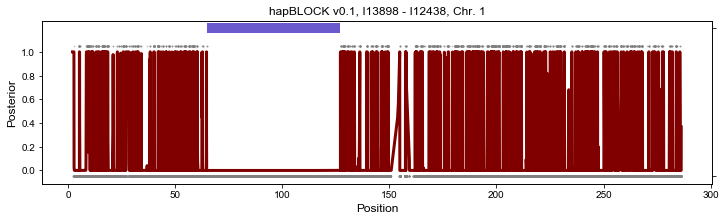

CPU times: user 1.27 s, sys: 31.9 ms, total: 1.3 s
Wall time: 1.41 s


In [116]:
%%time
iid1 ="I13898"
iid2 = "I12438"
ch=1
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 276.365312 mB
Total Log likelihood: -208313.783
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.866x
Filtering to common GP variants: 0.819x


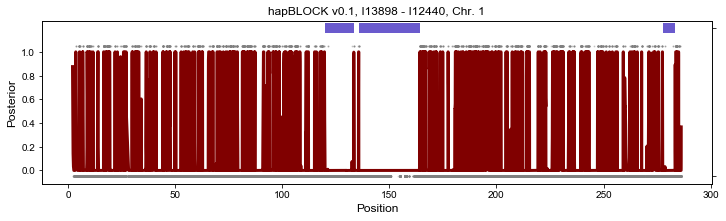

CPU times: user 1.31 s, sys: 24.1 ms, total: 1.33 s
Wall time: 1.42 s


In [118]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=1
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

In [ ]:
%%time
iid1 ="I13898"
iid2 = "I13890"
for ch in range(1,23):
    run_plot_pair(iids=[iid1, iid2], 
                        ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 276.353024 mB
Total Log likelihood: -208313.783
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Fraction Markers above IBD cutoff: 0.8107
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 28.49 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.866x
Filtering to common GP variants: 0.819x


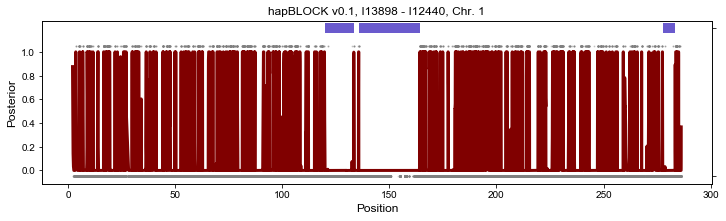

CPU times: user 1.32 s, sys: 45.3 ms, total: 1.37 s
Wall time: 2.07 s


In [106]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=1
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 264.23296 mB
Total Log likelihood: -161741.122
Fraction Markers above IBD cutoff: 0.9049
Merged n=1 gaps < 0.01 M
Called n=10 IBD Blocks > 4.0 cM
Longest Block: 20.57 cM
Fraction Markers above IBD cutoff: 0.9049
Merged n=1 gaps < 0.01 M
Called n=10 IBD Blocks > 4.0 cM
Longest Block: 20.57 cM
Filtering to 0.99 GP variants: 0.527x
Filtering to 0.99 GP variants: 0.800x
Filtering to common GP variants: 0.480x


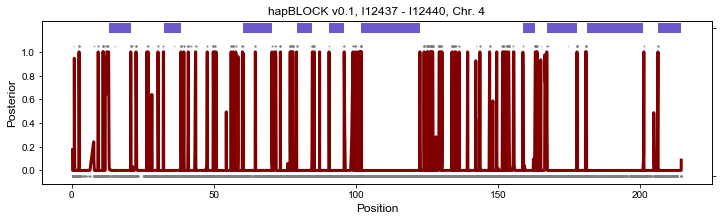

CPU times: user 1.36 s, sys: 44.5 ms, total: 1.4 s
Wall time: 1.64 s


In [93]:
%%time
iid1 ="I12437"
iid2 = "I12440"
ch=4
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True, output=True)  ### The two different sides

Minimum Genetic Map: 0.0032 Morgan
Maximum Genetic Map: 1.9203 Morgan
Gaps bigger than 0.1 cM: 151
Maximum Gap: 0.5062 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 411.295744 mB
Total Log likelihood: -171633.138
Fraction Markers above IBD cutoff: 0.9437
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 91.30 cM
Fraction Markers above IBD cutoff: 0.9437
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 91.30 cM
Filtering to 0.99 GP variants: 0.595x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.564x
Saved to ./figs/dumpster/for_inigo/I13888_I12439_7.png


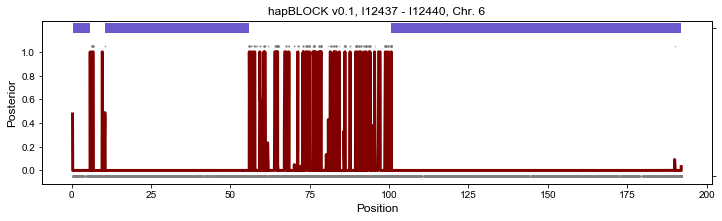

CPU times: user 3.27 s, sys: 40.5 ms, total: 3.31 s
Wall time: 3.39 s


In [267]:
%%time
run_plot_pair(iids=["I12437", "I12440"], 
                    ibd_out=1, ibd_in=1, ch=6,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png") ### 2nd degree

Minimum Genetic Map: 0.0032 Morgan
Maximum Genetic Map: 1.9203 Morgan
Gaps bigger than 0.1 cM: 151
Maximum Gap: 0.5062 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 411.25888 mB
Total Log likelihood: -167235.056
Fraction Markers above IBD cutoff: 0.9409
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 118.81 cM
Fraction Markers above IBD cutoff: 0.9409
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 118.81 cM
Filtering to 0.99 GP variants: 0.959x
Filtering to 0.99 GP variants: 0.869x
Filtering to common GP variants: 0.851x
Saved to ./figs/dumpster/for_inigo/I12439_I12440_6.png


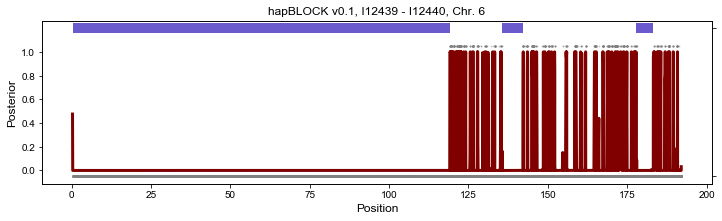

CPU times: user 3.32 s, sys: 35.4 ms, total: 3.36 s
Wall time: 3.44 s


In [268]:
%%time
iid1 ="I12439"
iid2 = "I12440"
ch=6
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png") ### 2nd degree

Minimum Genetic Map: 0.0034 Morgan
Maximum Genetic Map: 2.1454 Morgan
Gaps bigger than 0.1 cM: 193
Maximum Gap: 2.0422 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 411.19744 mB
Total Log likelihood: -163071.186
Fraction Markers above IBD cutoff: 0.8688
Merged n=0 gaps < 0.01 M
Called n=6 IBD Blocks > 4.0 cM
Longest Block: 20.13 cM
Fraction Markers above IBD cutoff: 0.8688
Merged n=0 gaps < 0.01 M
Called n=6 IBD Blocks > 4.0 cM
Longest Block: 20.13 cM
Filtering to 0.99 GP variants: 0.527x
Filtering to 0.99 GP variants: 0.940x
Filtering to common GP variants: 0.516x


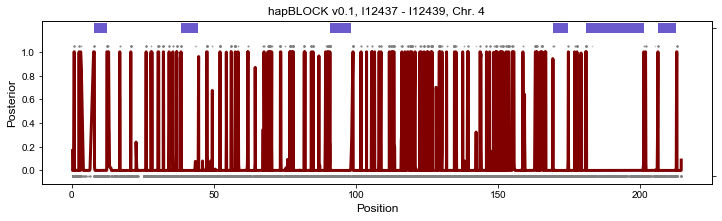

CPU times: user 1.12 s, sys: 39.1 ms, total: 1.16 s
Wall time: 1.23 s


In [264]:
%%time
iid1 ="I12437"
iid2 = "I12439"
ch=7
run_plot_pair(iids=["I12437", "I12439"], 
                    ibd_out=1, ibd_in=1, ch=4)  ### The two different sides

Minimum Genetic Map: 0.0016 Morgan
Maximum Genetic Map: 1.6630 Morgan
Gaps bigger than 0.1 cM: 168
Maximum Gap: 1.8819 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.601984 mB
Total Log likelihood: -111718.719
Fraction Markers above IBD cutoff: 0.9407
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 71.48 cM
Fraction Markers above IBD cutoff: 0.9407
Merged n=0 gaps < 0.01 M
Called n=3 IBD Blocks > 4.0 cM
Longest Block: 71.48 cM
Filtering to 0.99 GP variants: 0.914x
Filtering to 0.99 GP variants: 0.842x
Filtering to common GP variants: 0.804x
Saved to ./figs/dumpster/for_inigo/I13888_I12440_9.png


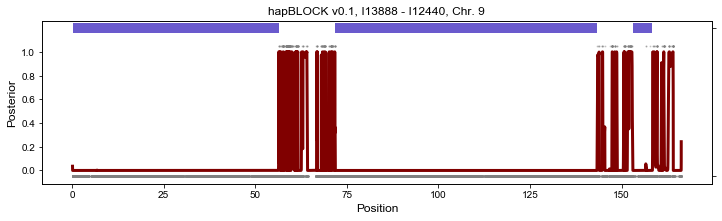

CPU times: user 2.9 s, sys: 33.8 ms, total: 2.94 s
Wall time: 3.01 s


In [482]:
%%time
iid1="I13888"
iid2="I12440"
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=9,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")

Minimum Genetic Map: 0.0016 Morgan
Maximum Genetic Map: 1.6630 Morgan
Gaps bigger than 0.1 cM: 168
Maximum Gap: 1.8819 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.221056 mB
Total Log likelihood: -114891.141
Fraction Markers above IBD cutoff: 0.9661
Merged n=3 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 77.69 cM
Fraction Markers above IBD cutoff: 0.9661
Merged n=3 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 77.69 cM
Filtering to 0.99 GP variants: 0.527x
Filtering to 0.99 GP variants: 0.842x
Filtering to common GP variants: 0.499x
Saved to ./figs/dumpster/for_inigo/I12437_I12440_9.png


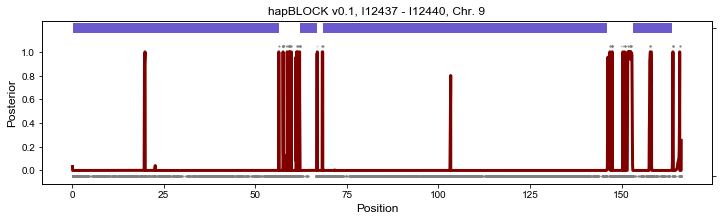

CPU times: user 2.98 s, sys: 55.2 ms, total: 3.04 s
Wall time: 3.64 s


In [478]:
%%time
iid1="I12437"
iid2="I12440"
ch=9
run_plot_pair(iids=[iid1,iid2], 
              ibd_out=1, ibd_in=1, ch=ch, 
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### From the right side

Filtering to 0.99 GP variants: 0.977x
Filtering to 0.99 GP variants: 0.850x
Filtering to common GP variants: 0.836x


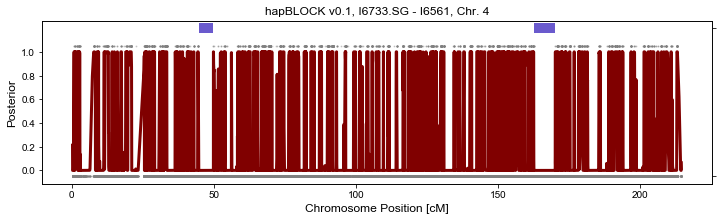

CPU times: user 1.09 s, sys: 57.6 ms, total: 1.15 s
Wall time: 2.09 s


In [5]:
%%time
iid1 ="I6733.SG"
iid2 = "I6561"

ch=4
run_plot_pair(iids=[iid1, iid2], 
                    ibd_out=1, ibd_in=1, ch=ch, plot=True)  ### The two different sides

Minimum Genetic Map: 0.0161 Morgan
Maximum Genetic Map: 1.2020 Morgan
Gaps bigger than 0.1 cM: 120
Maximum Gap: 2.8508 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.29888 mB
Total Log likelihood: -83480.830
Fraction Markers above IBD cutoff: 0.8619
Merged n=0 gaps < 0.01 M
Called n=2 IBD Blocks > 4.0 cM
Longest Block: 43.38 cM
Fraction Markers above IBD cutoff: 0.8619
Merged n=0 gaps < 0.01 M
Called n=2 IBD Blocks > 4.0 cM
Longest Block: 43.38 cM
Filtering to 0.99 GP variants: 0.890x
Filtering to 0.99 GP variants: 0.832x
Filtering to common GP variants: 0.780x
Saved to ./figs/dumpster/for_inigo/I13898_I12440_14.png


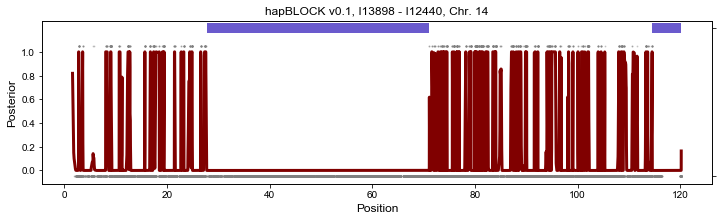

CPU times: user 2.61 s, sys: 30.7 ms, total: 2.65 s
Wall time: 2.74 s


In [353]:
%%time
iid1 ="I13898"
iid2 = "I12440"
ch=14
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.200576 mB
Total Log likelihood: -204920.656
Fraction Markers above IBD cutoff: 0.8492
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 39.08 cM
Fraction Markers above IBD cutoff: 0.8492
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 39.08 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.926x
Filtering to common GP variants: 0.866x
Saved to ./figs/dumpster/for_inigo/I13898_I13888_1.png


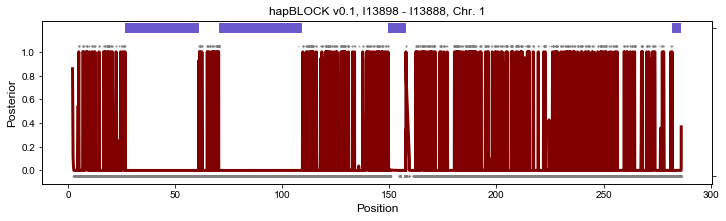

CPU times: user 3.74 s, sys: 77.7 ms, total: 3.82 s
Wall time: 3.89 s


In [400]:
%%time
iid1 ="I13898"
iid2 = "I13888"
ch=1
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

Minimum Genetic Map: 0.0201 Morgan
Maximum Genetic Map: 2.8627 Morgan
Gaps bigger than 0.1 cM: 253
Maximum Gap: 2.9229 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 370.200576 mB
Total Log likelihood: -204309.784
Fraction Markers above IBD cutoff: 0.9314
Merged n=1 gaps < 0.01 M
Called n=12 IBD Blocks > 4.0 cM
Longest Block: 41.46 cM
Fraction Markers above IBD cutoff: 0.9314
Merged n=1 gaps < 0.01 M
Called n=12 IBD Blocks > 4.0 cM
Longest Block: 41.46 cM
Filtering to 0.99 GP variants: 0.912x
Filtering to 0.99 GP variants: 0.577x
Filtering to common GP variants: 0.559x
Saved to ./figs/dumpster/for_inigo/I13898_I12437_1.png


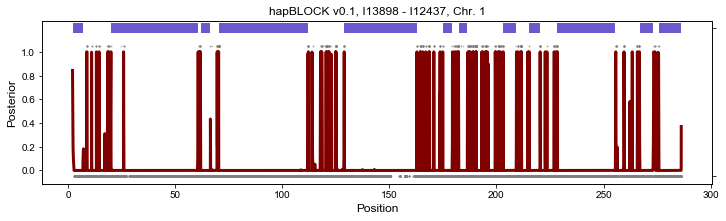

CPU times: user 3.43 s, sys: 37.6 ms, total: 3.47 s
Wall time: 3.56 s


In [399]:
%%time
iid1 ="I13898"
iid2 = "I12437"
ch=1
run_plot_pair(iids=[iid1, iid2], 
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"./figs/dumpster/for_inigo/{iid1}_{iid2}_{ch}.png")  ### The two different sides

## Check full relevant relatives in England N

In [ ]:
iids=["I12437","I12438"]
folder_out = "./output/empirical/england_n/"
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=iids, ch=ch, plot=True, folder_out=folder_out, output=False)

In [83]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")

In [86]:
df_t = df_full[df_full["lengthM"]>0.3]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

17.391162989345958

In [80]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13891 - I13898, 5th degree

0.4056779958773405

In [75]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13188 - I13898, 3rd degree

0.4056779958773405

In [70]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I13188 - I13898, 3rd degree

7.593811821599957

In [35]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12438 - I12440, 2nd degree

18.79735005433531

In [32]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12438 - I13898, 4-5th degree?

1.184385014581494

In [55]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # I12440 - I3888, 3rd degree

9.844745199476165

In [63]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) #  I12440 - I13898 4th degree

1.9595299522625282

In [81]:
3600 / 2**(5-1)

225.0

# Call IBD between two Yamnaya 591km apart

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 332.591104 mB
Total Log likelihood: -183101.717
Fraction Markers above IBD cutoff: 0.7975
Merged n=0 gaps < 0.01 M
Called n=2 IBD Blocks > 4.0 cM
Longest Block: 20.50 cM
Fraction Markers above IBD cutoff: 0.7975
Merged n=0 gaps < 0.01 M
Called n=2 IBD Blocks > 4.0 cM
Longest Block: 20.50 cM
Filtering to 0.99 GP variants: 0.919x
Filtering to 0.99 GP variants: 0.860x
Filtering to common GP variants: 0.814x
Saved to /n/groups/reich/hringbauer/git/ibdX_euro/figs/for_david/romania_moldave_long_ibd_ch3.png


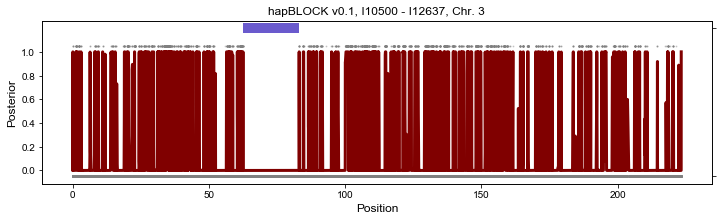

CPU times: user 3.53 s, sys: 41.6 ms, total: 3.58 s
Wall time: 3.65 s


In [70]:
%%time
iid1 ="I10500"
iid2 = "I12637"
ch=3
run_plot_pair(iids=[iid1, iid2], min_cm=8,
              ibd_out=1, ibd_in=1, ch=ch,
              savepath=f"/n/groups/reich/hringbauer/git/ibdX_euro/figs/for_david/romania_moldave_long_ibd_ch{ch}.png")  ### The two different sides

# Call IBD between Punic Indivdiuals

In [39]:
iids=["I18201","I18203"]
folder_out = "./output/empirical/punic/"
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=iids, ch=ch, plot=False, folder_out=folder_out, output=False)

In [44]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.25]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

4.427339091547765

In [6]:
df_t = df_full[df_full["lengthM"]>0.2]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

7.4560876654223875

In [17]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.4]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

2.5893408032438856

Filtering to 0.99 GP variants: 0.977x
Filtering to 0.99 GP variants: 0.850x
Filtering to common GP variants: 0.836x


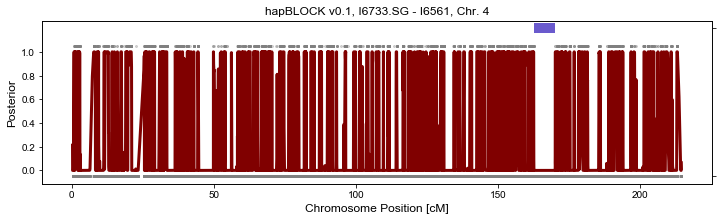

CPU times: user 1.05 s, sys: 47.8 ms, total: 1.1 s
Wall time: 1.16 s


In [12]:
%%time
iid1 ="I6733.SG"
iid2 = "I6561"
ch=4
run_plot_pair(iids=[iid1, iid2],
              ibd_out=1, ibd_in=1, ch=ch, min_cm=6, 
              plot=True, ms=2,
              savepath="")  ### The two different sides

In [30]:
np.sum([2.8426, 2.688187, 2.232549, 2.14201, 2.040477, 1.917145, 1.871491, 1.680018, 
                1.661367, 1.8090949, 1.5821669, 1.745901, 1.2551429, 1.1859521, 1.413411, 
                1.340264, 1.2849959, 1.175495, 1.0772971, 1.082123, 0.636394, 0.724438])


35.388519800000005

# Sredni Stog outlier with its Yamnaya bro

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.877x
Filtering to common GP variants: 0.860x


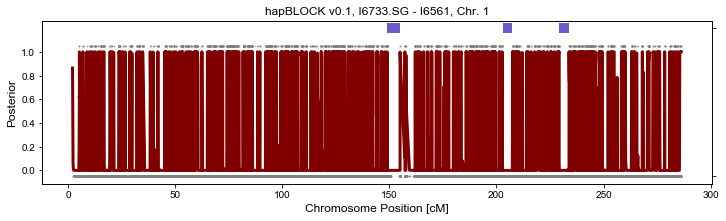

Filtering to 0.99 GP variants: 0.977x
Filtering to 0.99 GP variants: 0.874x
Filtering to common GP variants: 0.860x


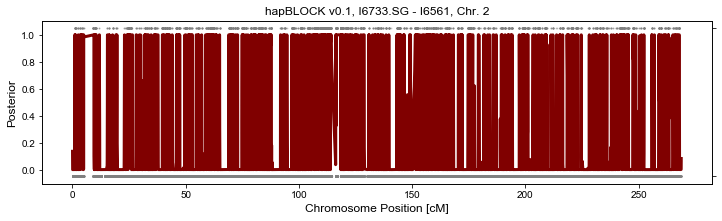

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.870x
Filtering to common GP variants: 0.854x


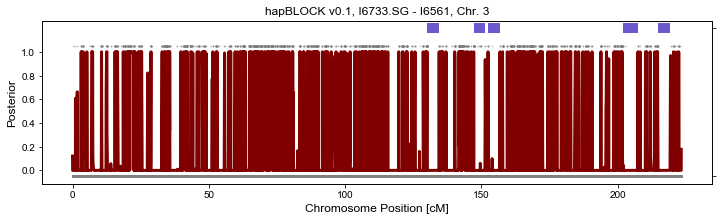

Filtering to 0.99 GP variants: 0.977x
Filtering to 0.99 GP variants: 0.850x
Filtering to common GP variants: 0.836x


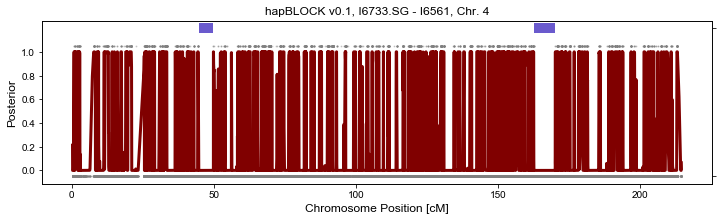

Filtering to 0.99 GP variants: 0.976x
Filtering to 0.99 GP variants: 0.880x
Filtering to common GP variants: 0.866x


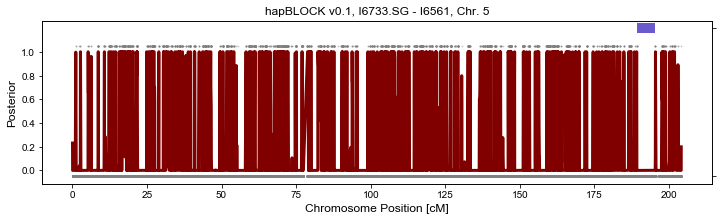

Filtering to 0.99 GP variants: 0.972x
Filtering to 0.99 GP variants: 0.898x
Filtering to common GP variants: 0.879x


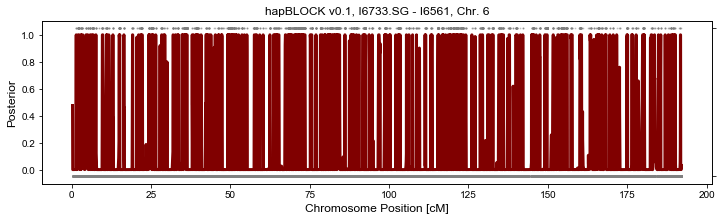

Filtering to 0.99 GP variants: 0.972x
Filtering to 0.99 GP variants: 0.862x
Filtering to common GP variants: 0.845x


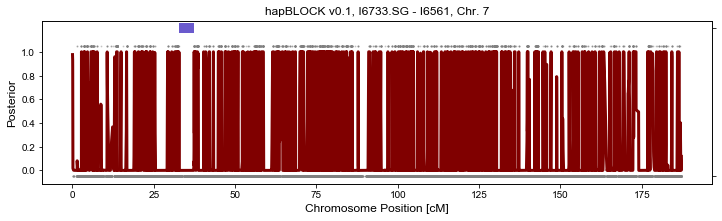

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.904x
Filtering to common GP variants: 0.886x


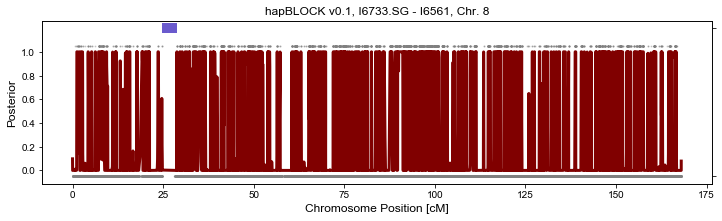

Filtering to 0.99 GP variants: 0.976x
Filtering to 0.99 GP variants: 0.868x
Filtering to common GP variants: 0.854x


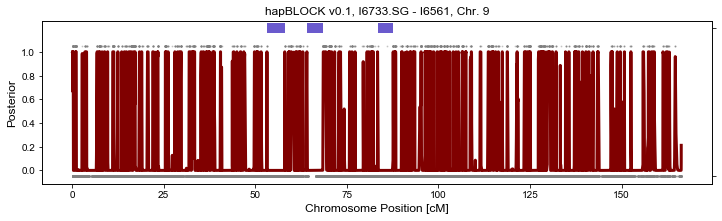

Filtering to 0.99 GP variants: 0.975x
Filtering to 0.99 GP variants: 0.900x
Filtering to common GP variants: 0.883x


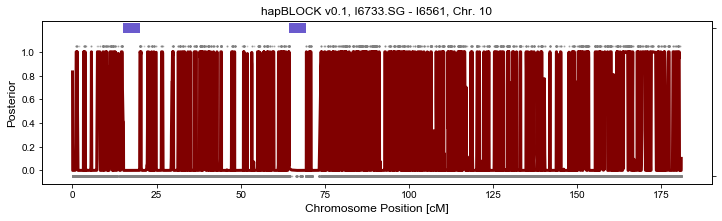

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.884x
Filtering to common GP variants: 0.868x


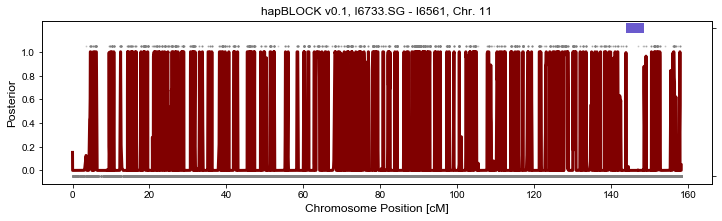

Filtering to 0.99 GP variants: 0.971x
Filtering to 0.99 GP variants: 0.884x
Filtering to common GP variants: 0.866x


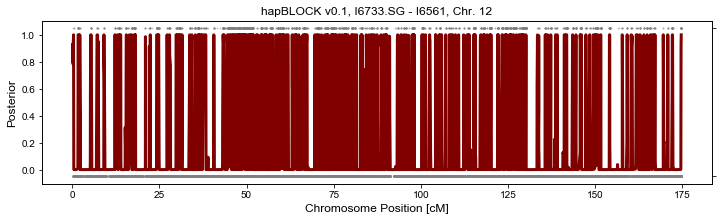

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.847x
Filtering to common GP variants: 0.832x


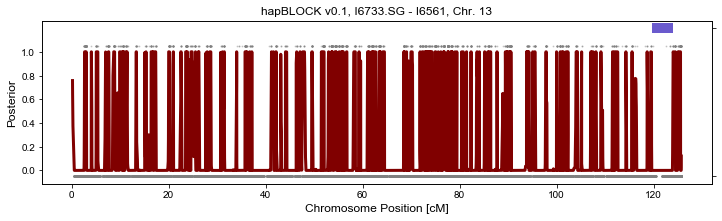

Filtering to 0.99 GP variants: 0.980x
Filtering to 0.99 GP variants: 0.882x
Filtering to common GP variants: 0.870x


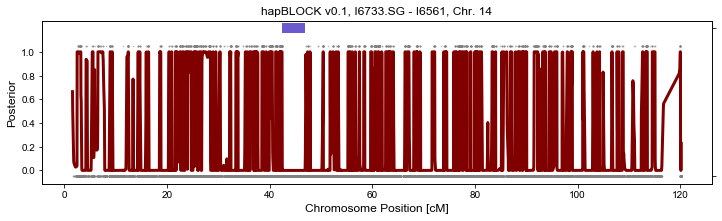

Filtering to 0.99 GP variants: 0.970x
Filtering to 0.99 GP variants: 0.853x
Filtering to common GP variants: 0.836x


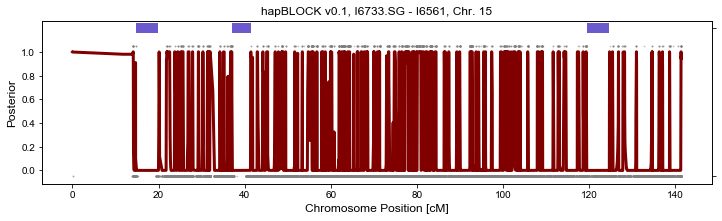

Filtering to 0.99 GP variants: 0.963x
Filtering to 0.99 GP variants: 0.859x
Filtering to common GP variants: 0.837x


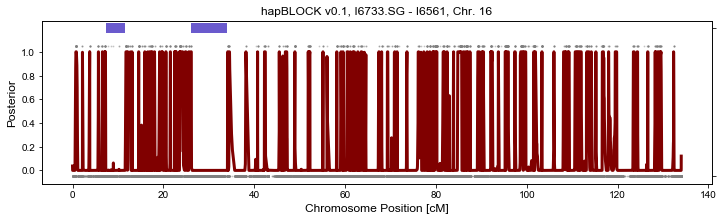

Filtering to 0.99 GP variants: 0.973x
Filtering to 0.99 GP variants: 0.854x
Filtering to common GP variants: 0.839x


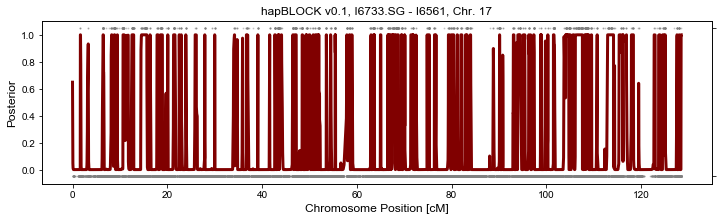

Filtering to 0.99 GP variants: 0.968x
Filtering to 0.99 GP variants: 0.848x
Filtering to common GP variants: 0.832x


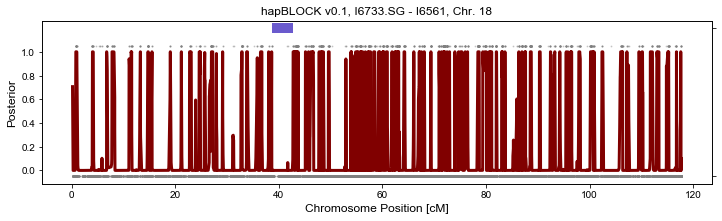

Filtering to 0.99 GP variants: 0.958x
Filtering to 0.99 GP variants: 0.820x
Filtering to common GP variants: 0.798x


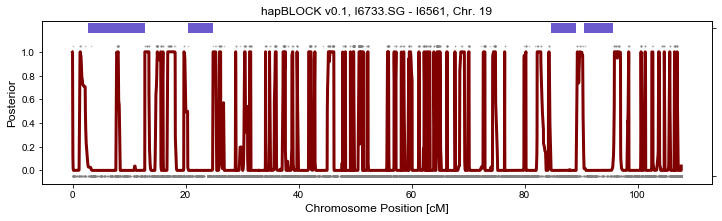

Filtering to 0.99 GP variants: 0.965x
Filtering to 0.99 GP variants: 0.864x
Filtering to common GP variants: 0.845x


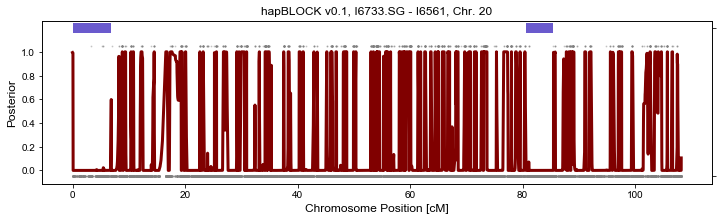

Filtering to 0.99 GP variants: 0.972x
Filtering to 0.99 GP variants: 0.871x
Filtering to common GP variants: 0.855x


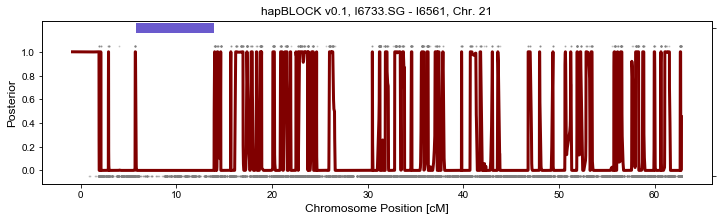

Filtering to 0.99 GP variants: 0.955x
Filtering to 0.99 GP variants: 0.858x
Filtering to common GP variants: 0.833x


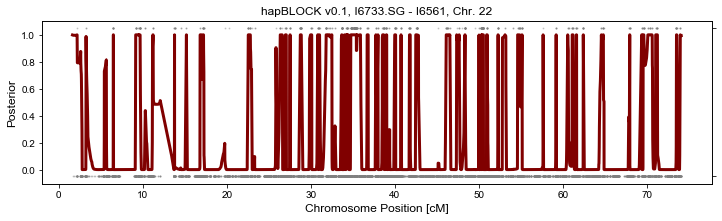

CPU times: user 19.6 s, sys: 661 ms, total: 20.2 s
Wall time: 25.5 s


In [6]:
%%time

iid1 ="I6733.SG"
iid2 = "I6561"

folder_out = "./output/empirical/yamnaya/"
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, folder_out=folder_out, output=False)

In [7]:

df_full = combine_individual_data(base_path=folder_out, iid=[iid1,iid2], delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.04]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

1.7678930386318825

In [8]:
df_t

,Start,End,StartM,EndM,length,lengthM,iid,ch
0,46096,47020,1.488929,1.549706,924,0.060777,iid0,1
1,63057,65319,2.028177,2.074051,2262,0.045874,iid0,1
2,72602,74154,2.292482,2.338654,1552,0.046172,iid0,1
0,47772,49408,1.301454,1.344345,1636,0.042891,iid0,3
1,55145,56854,1.471649,1.512545,1709,0.040896,iid0,3
2,57248,58862,1.524604,1.566115,1614,0.041511,iid0,3
3,73325,74374,2.017360,2.073724,1049,0.056364,iid0,3
4,76178,76878,2.147432,2.191552,700,0.044120,iid0,3
0,11372,12743,0.447259,0.499131,1371,0.051872,iid0,4
1,55622,58219,1.626727,1.702065,2597,0.075338,iid0,4


Filtering to 0.99 GP variants: 0.977x
Filtering to 0.99 GP variants: 0.850x
Filtering to common GP variants: 0.836x
Saved to ./output/dumpster/I6561_I6733.SG_IBDX.png


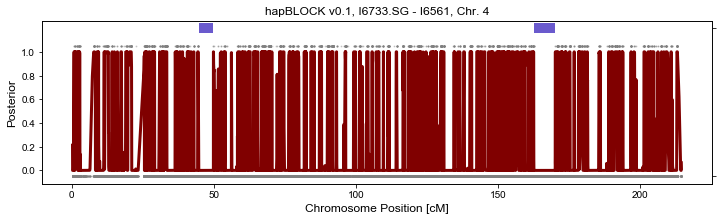

CPU times: user 2.88 s, sys: 68.5 ms, total: 2.95 s
Wall time: 3.02 s


In [11]:
%%time
iid1 ="I6733.SG"
iid2 = "I6561"

ch=4
run_plot_pair(iids=[iid1, iid2], savepath="./output/dumpster/I6561_I6733.SG_IBDX.png",
                    ibd_out=1, ibd_in=1, ch=ch, plot=True)  ### The two different sides

### Yamnaya Sredni Stog Hungary

In [ ]:
%%time

iid1 ="I6733.SG"
iid2 = "I18740"

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [17]:
df_full = combine_individual_data(base_path=folder_out, iid=[iid1,iid2], delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.04]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

1.4814000967890024

In [ ]:
df_t

In [ ]:
df_full = combine_individual_data(base_path=folder_out, iid=iids, delete=False, chs=chs, 
                                  prefix_out="", file="ibd.tsv", file_result="_ibd_full.csv")
df_t = df_full[df_full["lengthM"]>0.25]
np.sum(df_t["lengthM"]) # #I12433 - I12437, 1st degree

### Globular Amphora - Corded Ware

In [ ]:
iid1 ="MA969.SG" # Estonia Corded Ware
iid2 = "ILK002"

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [ ]:
iid1 ="MA969.SG" # Estonia Corded Ware
iid2 = "I6733.SG" # Yamnaya

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

In [ ]:
iid1 ="ILK002" # Globular Amphora
iid2 = "I6733.SG" # Yamnaya

folder_out = "./output/empirical/yamnaya/" #
#folder_out = ""
chs = range(1,23)

for ch in chs:
    run_plot_pair(iids=[iid1,iid2], ch=ch, plot=True, 
                  folder_out=folder_out, output=False)

# Check the simulated individuals

Minimum Genetic Map: 0.0000 Morgan
Maximum Genetic Map: 2.2326 Morgan
Gaps bigger than 0.1 cM: 214
Maximum Gap: 0.2348 cM
Upper Gap Cutoff: 5.0000 cM
HMM State Number: 4
Memory Usage Full:
Memory Usage: 253.145088 mB
Total Log likelihood: -186136.674
Fraction Markers above IBD cutoff: 0.7359
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 9.11 cM
Fraction Markers above IBD cutoff: 0.7359
Merged n=0 gaps < 0.01 M
Called n=4 IBD Blocks > 4.0 cM
Longest Block: 9.11 cM
Successfully saved output to ./output/simulated/test/iid2A_iid2B/chr3/
Filtering to 0.99 GP variants: 1.000x
Filtering to 0.99 GP variants: 1.000x
Filtering to common GP variants: 1.000x


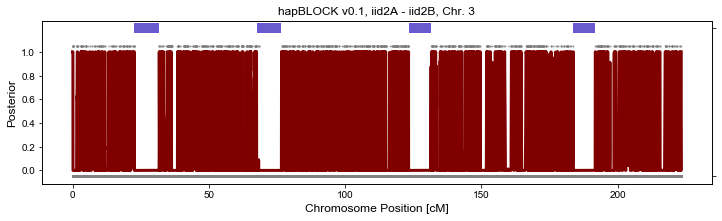

CPU times: user 1.11 s, sys: 38.4 ms, total: 1.15 s
Wall time: 1.17 s


In [12]:
%%time
iid1 ="iid2A" # Globular Amphora
iid2 = "iid2B" # Yamnaya

folder_out = "./output/simulated/test/" #
#folder_out = ""
ch = 3

run_plot_pair(folder_in = "/n/groups/reich/hringbauer/git/hapBLOCK/output/simulated/TSI/ch3_8cm/sim_ch",
              iids=[iid1,iid2], ch=ch, plot=True, 
              folder_out=folder_out, output=True)